# Luis Wen

## Research question/interests

## **How does the global offense influence the outcome of matches between countries attending the 2022 world cup?**

#### Analysis plan: I will add a column noting the difference between the previous measurement of global offense (global_o) and the current one, noting if it increase or decreased. With this new column, I will create a data visualization plot to compare the relationship between the difference in offense with the simulated wins (sim_wins). Furthermore, comparing this graph with the score of the match to see if a higher offense leads to more goals scored will be helpful in determining how exactly does a team's offense can affect matches.

In [ ]:
import pandas as pd
dfP = pd.read_csv('../data/raw/wc_forecasts.csv')
dfM = pd.read_csv('../data/raw/wc_matches.csv')
dfP.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-18 17:56:03 UTC,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2022-12-18 17:56:44 UTC
1,2022-12-18 17:56:03 UTC,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2022-12-18 17:56:44 UTC
2,2022-12-18 17:56:03 UTC,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
3,2022-12-18 17:56:03 UTC,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
4,2022-12-18 17:56:03 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC


In [ ]:
import numpy as np 
# Initial forecast dataset includes the winners of each group, and the tournament winner (Argentina)
# I dropped columns I thought were irrelevant for the summary of the dataset
dfP2 = dfP.drop(columns=['forecast_timestamp', 'group', 'timestamp'])
# Row 161-256 are the rows in which the actual predictions were made, as they were being updated after each match outcome
dfP3 = dfP2.loc[161:256]
dfP3.describe(include=np.number).T
# 95 predictions were made withing this range of rows

,count,mean,std,min,25%,50%,75%,max
spi,95.0,73.935593,10.996478,48.16112,66.022585,74.29647,81.697265,93.65727
global_o,95.0,2.104278,0.501709,1.27862,1.682725,1.98575,2.505085,3.22213
global_d,95.0,0.691459,0.195907,0.26042,0.573690,0.68239,0.790620,1.31642
sim_wins,95.0,1.071339,0.613418,0.03652,0.581380,1.05175,1.516730,2.64890
sim_ties,95.0,0.828097,0.432743,0.14240,0.526615,0.77856,1.195950,2.31530
sim_losses,95.0,1.100564,0.602639,0.07083,0.623085,1.10635,1.535675,2.77578
sim_goal_diff,95.0,-0.052078,3.008571,-10.08883,-1.506450,-0.15400,1.363210,8.54154
goals_scored,95.0,3.749266,1.902778,0.60432,2.471240,3.31309,4.663180,10.60562
goals_against,95.0,3.801344,1.786856,0.96686,2.543020,3.63598,4.403200,11.38781
group_1,95.0,0.242156,0.269645,0.00000,0.029340,0.13455,0.358625,0.99992


In [ ]:
dfP2.describe(exclude=np.number).T
# An initial observation of of the filtered dataset is the unique teams attending the 2022 World Cup

,count,unique,top,freq
team,256,32,Argentina,8


In [ ]:
dfM2 = dfM.drop(columns=['league_id', 'league'])
# Dropping columns like league, and league_id since they are 'extra'
dfM2.describe(include=np.number).T
# Simple summary of the dataframe 

,count,mean,std,min,25%,50%,75%,max
spi1,64.0,77.321094,11.158028,48.1600,68.747500,78.72500,87.232500,93.6600
spi2,64.0,74.295781,10.785255,48.4600,66.052500,74.46000,79.505000,93.4800
prob1,64.0,0.443198,0.204479,0.0363,0.285125,0.44595,0.607025,0.8261
prob2,64.0,0.358316,0.195187,0.0595,0.203875,0.31215,0.504700,0.8112
probtie,64.0,0.198484,0.122114,0.0000,0.108150,0.25750,0.291175,0.3371
proj_score1,64.0,1.325312,0.476821,0.3100,0.985000,1.31500,1.620000,2.6000
proj_score2,64.0,1.139219,0.434596,0.4400,0.820000,1.05500,1.367500,2.5500
score1,64.0,1.578125,1.551289,0.0000,0.000000,1.00000,2.000000,7.0000
score2,64.0,1.109375,1.055856,0.0000,0.000000,1.00000,2.000000,4.0000
xg1,64.0,1.075469,0.725199,0.0700,0.600000,0.88500,1.430000,3.1000


In [ ]:
dfM2.describe(exclude=np.number).T
# Some insights include a total of 32 teams attending the 2022 World Cup
# The tournament took 23 days to conclude (by the unique count)

,count,unique,top,freq
date,64,23,2022-12-01,4
team1,64,32,Argentina,5
team2,64,32,Morocco,4


<AxesSubplot:xlabel='global_o', ylabel='global_d'>

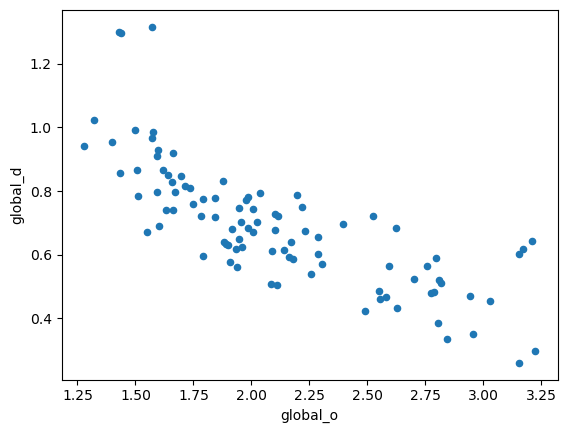

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dfP3.plot(kind='scatter', x='global_o', y='global_d')
# Some observations from this plot, is that few teams have a high defense (above 0.8), while most teams their offense
# around 1.5 to 2.25

Text(0.5, 0.98, 'Relationship between predictive factors')

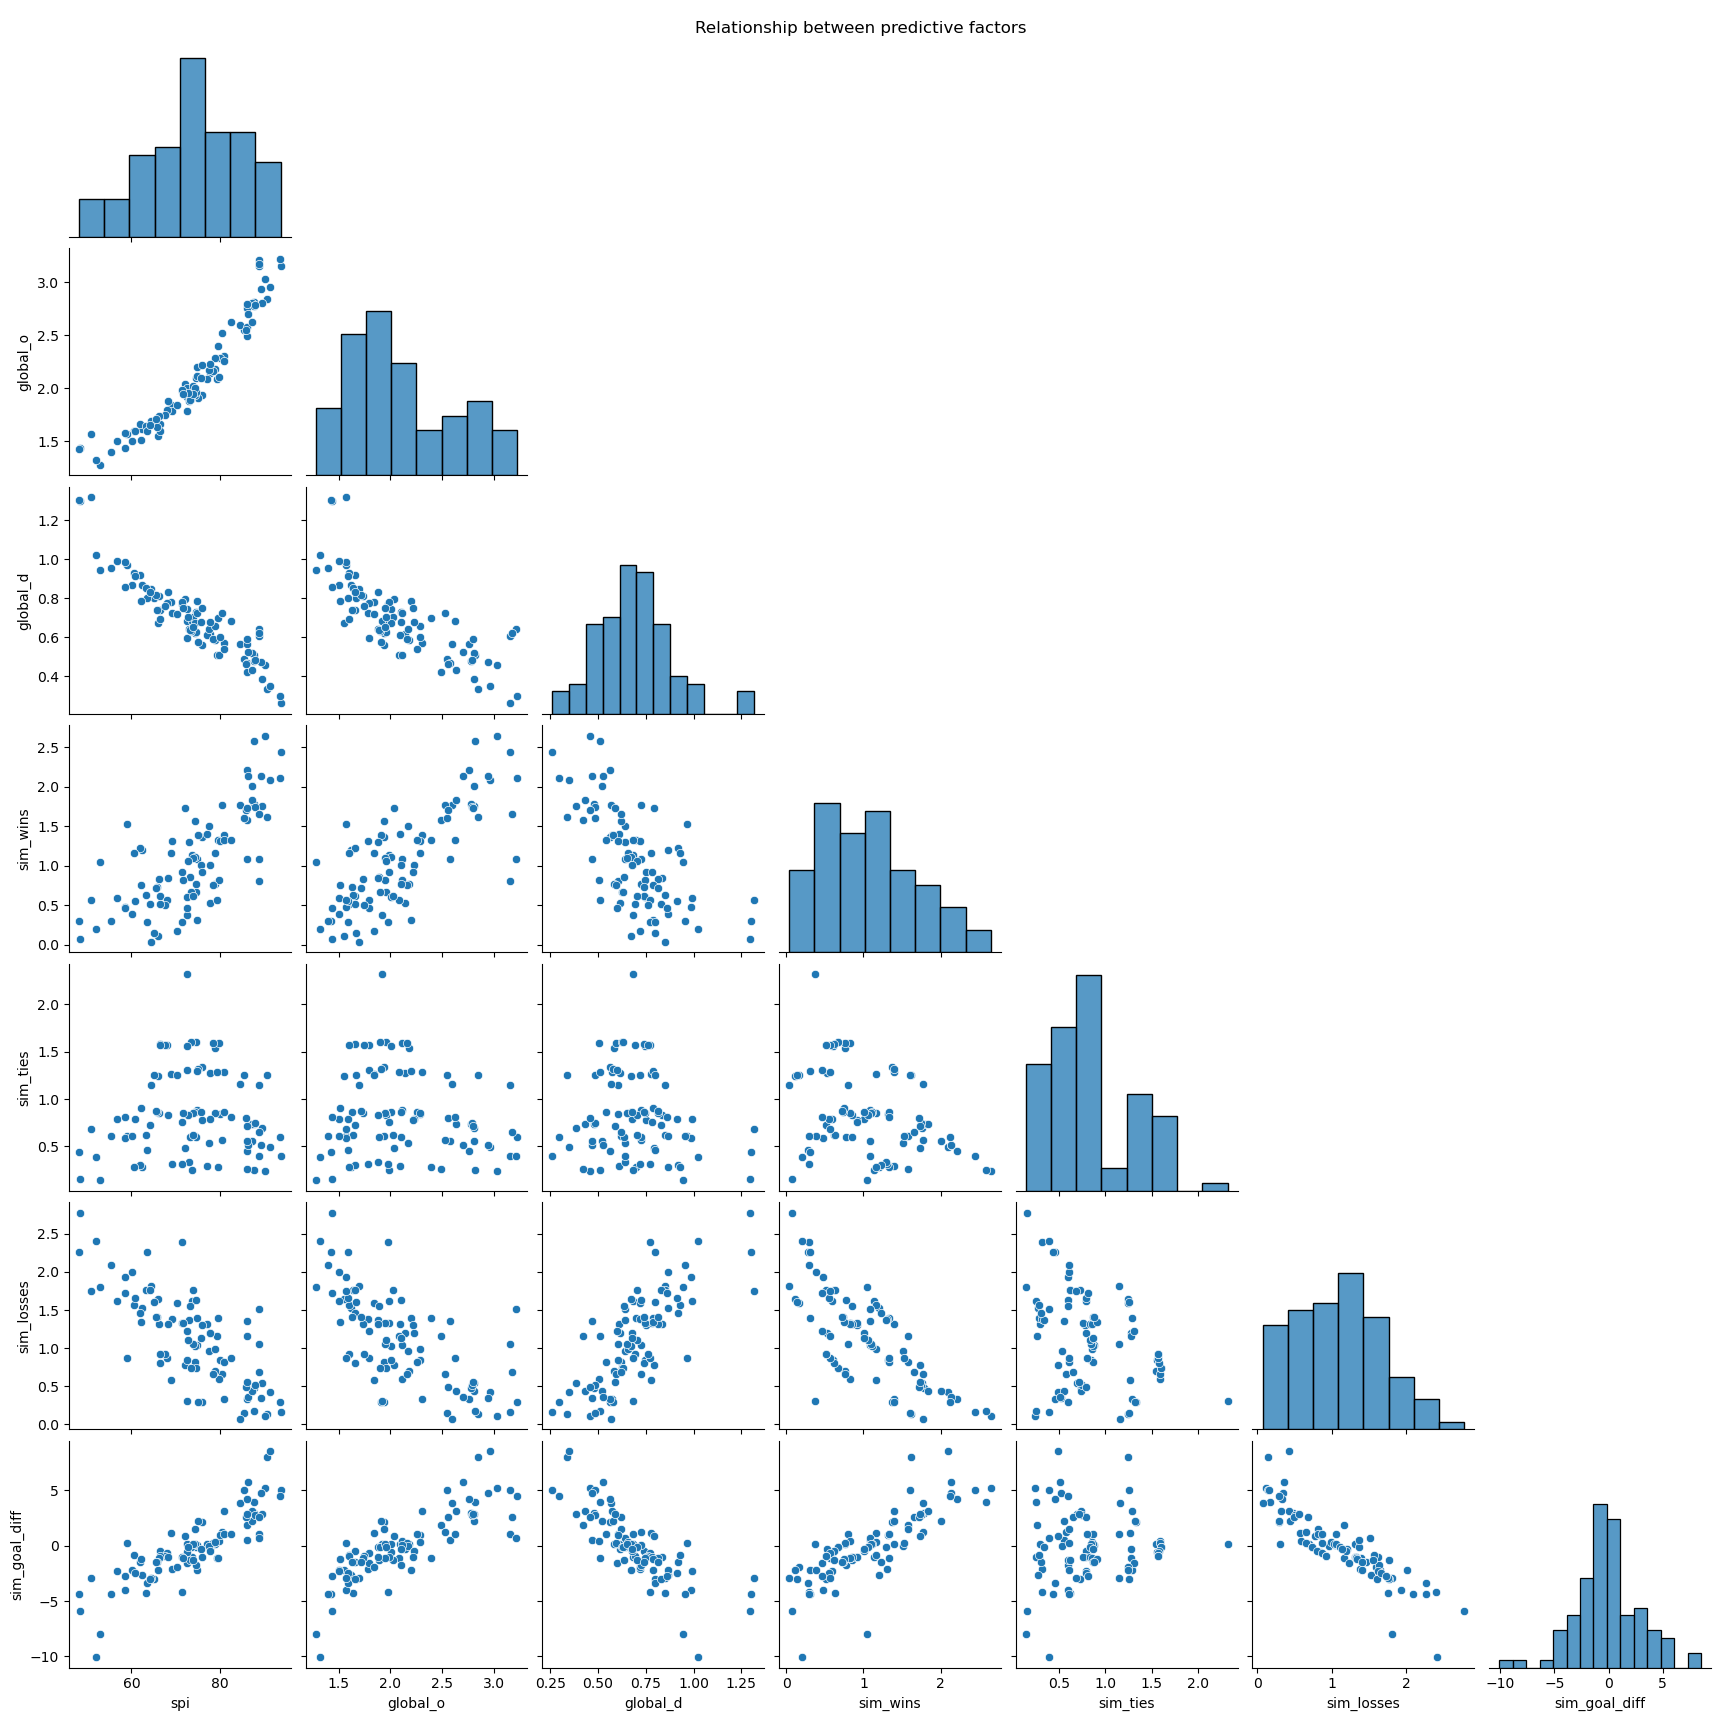

In [ ]:
predictions = sns.pairplot(data=dfP3, vars=['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff']
             , corner=True)
predictions.fig.suptitle("Relationship between predictive factors")
# Some details to note is the team's offense increase alongside the Soccer Power Index, and team's defense
# decrease alongside the Soccer Power Index
# Higher offense implies a higher amount of goals scored meanwhile, higher defense suggests that
# the opposing team will score less goals
# Most bar plots have a bell shaped distribution where the highest is in the middle (the peak) or near the middle

<seaborn.axisgrid.FacetGrid>

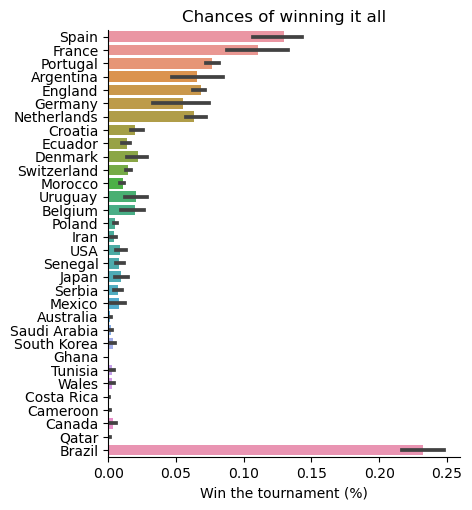

In [ ]:
sns.catplot(data=dfP3, y='team', x='win_league', kind='bar').set(title="Chances of winning it all", 
                                                                 xlabel="Win the tournament (%)", ylabel="")
# Initial chances of winning the entire tournament for the teams attenting the 2022 World Cup
# Brazil, Spain, and France are the teams with the highest possibility to win it all

Text(0.5, 0.98, 'Adjusted metrics after matches')

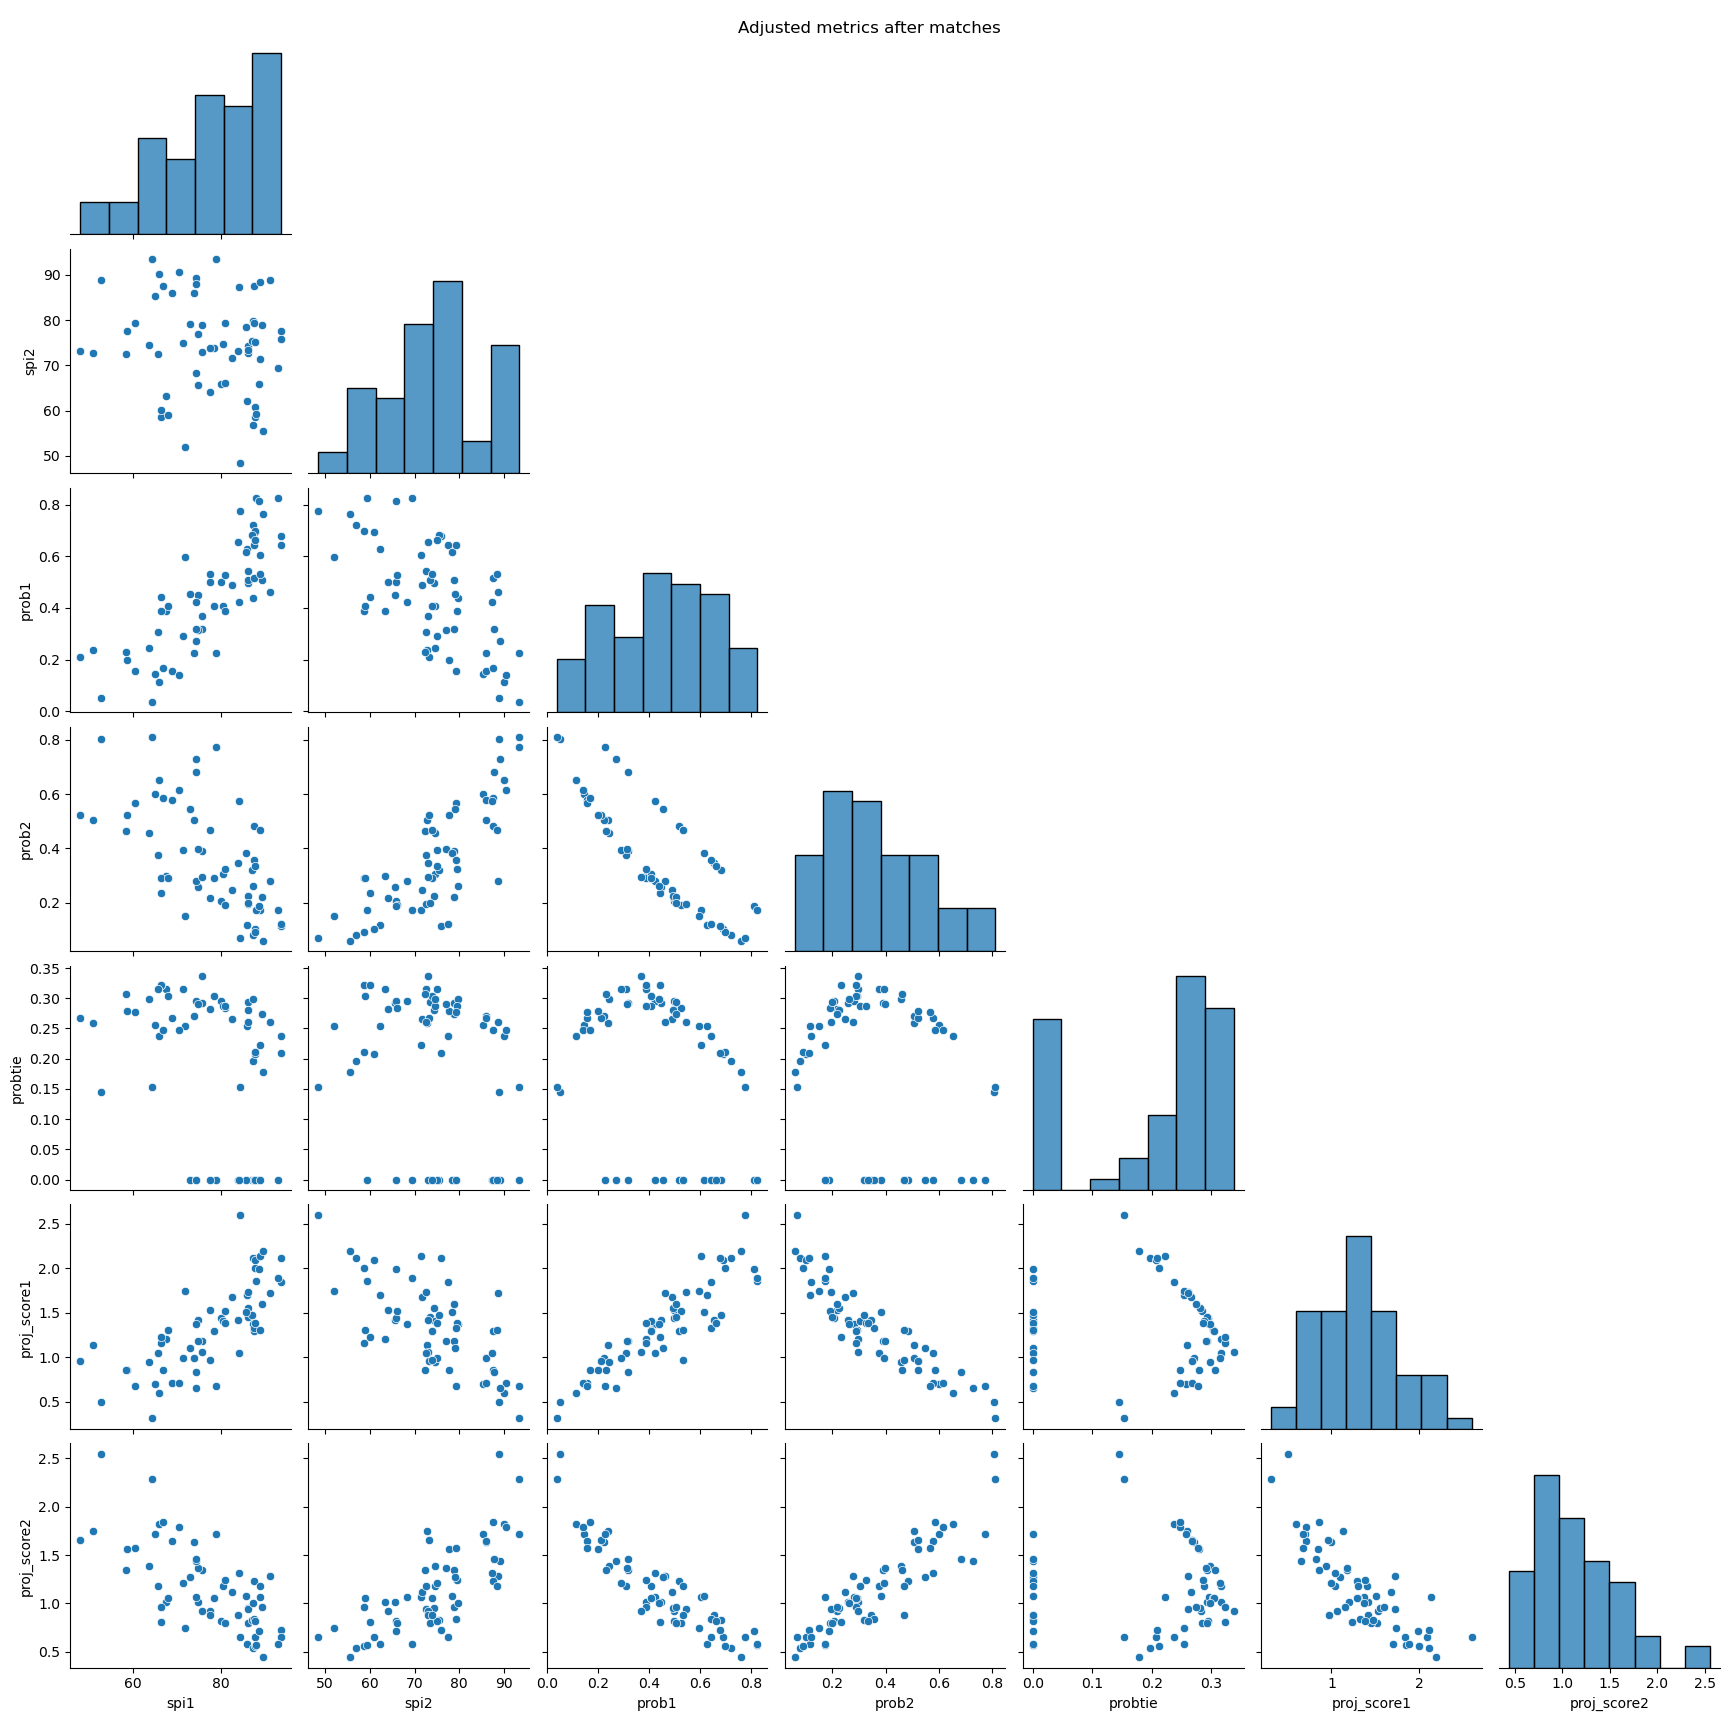

In [ ]:
matches = sns.pairplot(data=dfM2, vars=['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2']
             , corner=True)
matches.fig.suptitle("Adjusted metrics after matches")
# There is no clear trend for the SPI (for both team1 and team2)
# The probability of each team winning is distributed close to evenly
# The projected scores and probability to tie are nearly identical 
# The projected score and SPI increases given a better offense 
# Team 1 had a higher amount of teams with projected scores higher than team 2